As requested by the attendants, we will focus on learning Keras. Preprosesing data is perhaps the most important step in machine learning and given several models, they all behave similar once you have enough data. We already have an intro notebook covering the most common steps to attack a new problem, make sure to read it.

As homework, you were supposed to have installed Keras, here are the instructions again:
https://keras.io/#installation 

For our purpuses, first install TensorFlow.

To install Keras, you need Linux or Mac. Don't worry if you have windows, as soon as we get familiar with Neural Networks we will change from Keras to Pytorch. If you have Windows you can install Pytorch instead and start reading the tutorials here: https://pytorch.org, we will have a session for introduction to Pytorch as well.

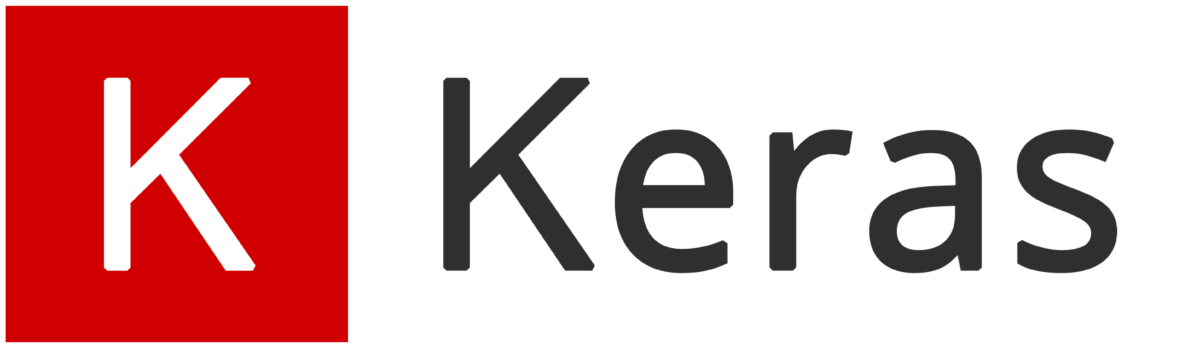

In [1]:
from IPython.display import Image
Image("Keras.png")

Keras (κέρας) means horn in Greek. It is a reference to a literary image from ancient Greek and Latin literature, first found in the Odyssey, where dream spirits (Oneiroi, singular Oneiros) are divided between those who deceive men with false visions, who arrive to Earth through a gate of ivory, and those who announce a future that will come to pass, who arrive through a gate of horn. It's a play on the words κέρας (horn) / κραίνω (fulfill), and ἐλέφας (ivory) / ἐλεφαίρομαι (deceive).

Keras was initially developed as part of the research effort of project ONEIROS (Open-ended Neuro-Electronic Intelligent Robot Operating System).

    "Oneiroi are beyond our unravelling --who can be sure what tale they tell? Not all that men look for comes to pass. Two gates there are that give passage to fleeting Oneiroi; one is made of horn, one of ivory. The Oneiroi that pass through sawn ivory are deceitful, bearing a message that will not be fulfilled; those that come out through polished horn have truth behind them, to be accomplished for men who see them." Homer, Odyssey 19. 562 ff (Shewring translation).

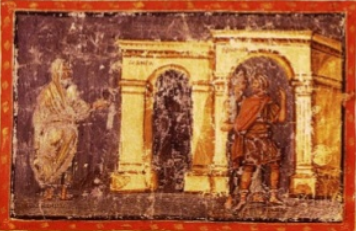

In [4]:
from IPython.display import Image
Image("ker.png")

We use random data with random labels just to show that our algorithm works.


In [3]:
import numpy as np
x_train = np.random.random((1000,64)) #here we are asking for 1000 random numbers
y_train = np.random.random((1000,10)) #random labels 

#Here is a more interesting example to play with after the lecture,
#Given a number x of 64 digits, we want a program that returns the last digit of the product of 
#the last two  last digits of x. 
#from keras.utils import to_categorical
#import numpy as np
#x_train = np.random.random((1000,64)) #here we are asking for 1000 random numbers
#last_digits = [ (x[-1]*x[-2]) %10 for  x in x_train] #we multiply the last two digits
#y_train = to_categorical(last_digits) #we only consider the last digit and use it as a class

The following code imports the required libraries to create a feed forward neural network.

In [4]:
from keras.models import  Model
from keras import layers
from keras import Input

Using TensorFlow backend.


The following code declares that the input are tensors of size 64 x number of data,
$x=(a_1\otimes a_2\otimes\cdots\otimes a_{64}).$
We don't  need to specify the data size.



In [5]:
input_tensor = Input(shape = (64,))

Our class of physics students may wonder if a tensor here is the same as a tensor in physics. The answer is yes, a tensor is a multilineal object, you can think of it as a higher dimensional matrix $M_{n_1,n_2,n_3,\cdots,n_{64}}$.


We will construct the following architecture: a layer of 32 neurons, followed by a 'relu'. Then  another layer of 32 neurons followed by a 'relu', and 10 final layers followed by a 'softmax'. So the output can be seen as a vector in $R^{10}.$

$\hbox{softmax}(W_{10x32}(\hbox{relu}(W_{32x32}(\hbox{relu}(W_{32x64}(x))))))$

Where $W_{a,b}$ are matrices from $R^b$ to $R^a$, softmax and relu are non linearities.


In [6]:
x = layers.Dense(32, activation = 'relu')(input_tensor)
x = layers.Dense(32, activation = 'relu')(x)
output_tensor = layers.Dense(10, activation = 'softmax')(x)


The notation is just the same notation of composition of functions!

The code below creates the model:

In [7]:
model = Model(input_tensor, output_tensor)
model.summary()


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 64)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 32)                2080      
_________________________________________________________________
dense_2 (Dense)              (None, 32)                1056      
_________________________________________________________________
dense_3 (Dense)              (None, 10)                330       
Total params: 3,466
Trainable params: 3,466
Non-trainable params: 0
_________________________________________________________________


Look at the number of parameters, those are coefficients that the machine needs to determine. To do that we need to choose a 'loss function'. Everytime the program runs, it will take data and  it will use the loss function to find how far are we from a good answer. Once the error is calculated, we  use calculus (optimization) to answer: how should the current parameters change to minimize this error? this is the step where the matrix coefficients are changed.

In the following code, we use "categorical cross entropy" as the error, and "rmsprop" as the optimization step.

In [8]:
model.compile(optimizer = 'rmsprop', loss = 'categorical_crossentropy')

Now that we have specified all parameters of our model, we need to give it data and to start training it.

In [9]:
model.fit(x_train,y_train, epochs = 10,batch_size=128)

Epoch 1/10
1000/1000 [==============================] - 3s 3ms/step - loss: 11.7143
Epoch 2/10
1000/1000 [==============================] - 0s 66us/step - loss: 11.6321
Epoch 3/10
1000/1000 [==============================] - 0s 79us/step - loss: 11.6197
Epoch 4/10
1000/1000 [==============================] - 0s 78us/step - loss: 11.6111
Epoch 5/10
1000/1000 [==============================] - 0s 67us/step - loss: 11.6056
Epoch 6/10
1000/1000 [==============================] - 0s 61us/step - loss: 11.6014
Epoch 7/10
1000/1000 [==============================] - 0s 71us/step - loss: 11.5974
Epoch 8/10
1000/1000 [==============================] - 0s 99us/step - loss: 11.5945
Epoch 9/10
1000/1000 [==============================] - 0s 78us/step - loss: 11.5928
Epoch 10/10
1000/1000 [==============================] - 0s 98us/step - loss: 11.5901


Note the parameters epochs = 10,batch_size=128. An epoch is how many times does the algorithm sees the whole data. Sometimes it is useful to split the data and train the algorithm with those batches. 

Once the model is trained, how accurate is it? we will just see how often it returned the correct answer with the whole data, this is a terrible thing to do because in real life we want to test models with data that we don't have, rather than evaluating with the data that we have. We want self driving cars that will behave nicely in the street not only on labs. But this is a more complicated topic that we will talk about in the future.

In [10]:
score = model.evaluate(x_train, y_train)

1000/1000 [==============================] - 0s 206us/step


In [11]:
print(score)

11.586689132690429


The image came from: https://wolfweb.unr.edu/homepage/dcronan/CH201/illus/ivory_gate.html